In [1]:
import tensorflow as tf
from tensorflow import keras

<h2> Building an image classifier for Fashion MNIST </h2> 


<h3> EDA </h3>

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
# Loading the data from keras library
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
# We have 60,000 training rows with 28 with 28 x 28 features
# Every image is represented in 28 x 28 pixels. 
x_train_full.shape

(60000, 28, 28)

In [6]:
x_train_full.dtype

dtype('uint8')

In [7]:
x_train_full[0][0].shape

(28,)

In [8]:
# Identifying the range of values of x
max_val = 0
min_val = 0
for row in x_train_full:
    for x in row:
        if max(x) > max_val:
            max_val = max(x)
        if min(x) < min_val:
            min_val = min(x)


In [9]:
# Identifying the range of values for the features
max_val, min_val

(255, 0)

In [10]:
# 9 target classes
set(y_train_full.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [11]:
# Creating a validation set and scaling the features to a [0,1] scale
x_valid, x_train = x_train_full[:5000]/255.0 , x_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

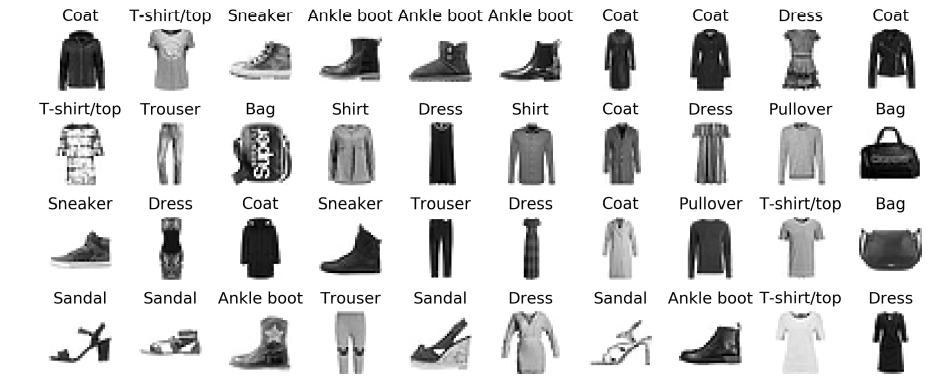

In [12]:
# Creating class names for each of the labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[0]]

'Coat'

<h3> Model building </h3>
<li> Classification MLP with 2 hidden layers </li>

In [13]:
model = keras.models.Sequential([
    # Input layer to convert each image into a 1D array. Converts array into (-1,1)
    keras.layers.Flatten(input_shape=[28,28]), 
    keras.layers.Dense(300, activation="relu"), # Hidden layer
    keras.layers.Dense(100, activation="relu"), # Hidden layer
    keras.layers.Dense(10, activation="softmax") # Output layer with softmax
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [15]:
input_layer_weights, bias = model.get_weights()[0], model.get_weights()[1]

In [16]:
# input layer weights are all randomized
# First hidden layer has 784 x 300 weights + 300 bias terms = 235,500 params
# Each layer has weights + bias 
input_layer_weights, input_layer_weights.shape,bias.shape

(array([[ 0.00923972,  0.01514657,  0.06491376, ..., -0.05287768,
         -0.06747749,  0.05498108],
        [-0.05655628, -0.07061762,  0.05766627, ..., -0.0005211 ,
         -0.04874142, -0.02405642],
        [ 0.01978879,  0.063235  ,  0.04199661, ...,  0.03477215,
          0.04096825,  0.05983481],
        ...,
        [ 0.05169852, -0.04528573,  0.04689568, ...,  0.05643003,
         -0.02364876,  0.02783502],
        [-0.0319096 ,  0.06964566, -0.04184466, ..., -0.00196576,
          0.04159967, -0.01095728],
        [ 0.04537389, -0.03118105,  0.05203106, ..., -0.03611535,
          0.06281555, -0.06287661]], dtype=float32),
 (784, 300),
 (300,))

In [17]:
# Call compile to specify loss and optimizer to be used

# We use sparse categorical crossentropy because we have sparse labels (for each instance we have only one target class)
# Stochastic gradient descent training
# Classification problem = Accuracy as metric 
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = "sgd",
             metrics = ['accuracy'])

<h3> Training the model </h3>

In [29]:
history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 1s 673us/step - loss: 0.0587 - accuracy: 0.9800 - val_loss: 0.3823 - val_accuracy: 0.8982
Epoch 2/30
1719/1719 [==============================] - 1s 667us/step - loss: 0.0561 - accuracy: 0.9815 - val_loss: 0.3871 - val_accuracy: 0.8962
Epoch 3/30
1719/1719 [==============================] - 1s 663us/step - loss: 0.0561 - accuracy: 0.9819 - val_loss: 0.4384 - val_accuracy: 0.8840
Epoch 4/30
1719/1719 [==============================] - 1s 673us/step - loss: 0.0562 - accuracy: 0.9811 - val_loss: 0.4028 - val_accuracy: 0.8964
Epoch 5/30
1719/1719 [==============================] - 1s 662us/step - loss: 0.0537 - accuracy: 0.9822 - val_loss: 0.3839 - val_accuracy: 0.8968
Epoch 6/30
1719/1719 [==============================] - 1s 668us/step - loss: 0.0528 - accuracy: 0.9827 - val_loss: 0.4052 - val_accuracy: 0.8894
Epoch 7/30
1719/1719 [==============================] - 1s 661us/step - loss: 0.0513 - accuracy: 0.9828 - val_loss: 0.4057 -

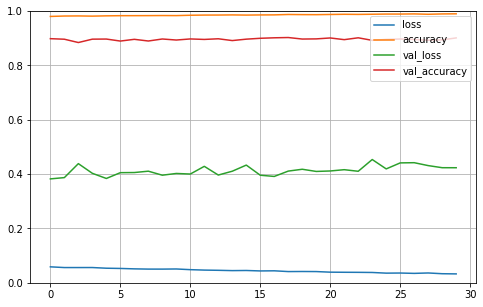

In [30]:
# Visualizing loss
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [33]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 602us/step - loss: 153.7581 - accuracy: 0.8406


[153.75814819335938, 0.8406000137329102]

In [37]:
# Making predictions
x_new = x_test[:5]
y_prob = model.predict(x_new)
y_prob.round(3) # 1 prediction for each input

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)